# Series of experiments performed with ibab implementation of wavenet

First experiments consisted of sinusoidal signal input with sample rate 16000 Hz and frequency 440 Hz. Some of the parameters have been modified in order to reduce the complexity and the computational cost of the network.

Import and plot input data

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

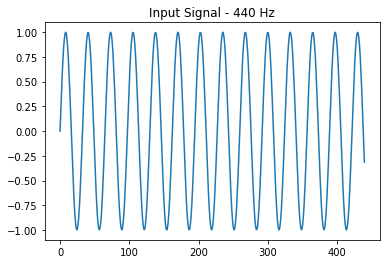

In [3]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
print
signal = wavfile.read('longerSinus/sinus16000.wav')
signal = signal[1]
plt.figure(1)
plt.title('Input Signal - 440 Hz')
reduced = signal[:440]
plt.plot(reduced)
plt.show()

In this first  experiment we used the recommendations from the paper. That means 5 stacked layers with 10 dilation layers per stack. That give a receptive field of **5116**.

`receptive_field = (filter_width - 1) * sum(dilations) + 1`
 
 where 
 
 `filter_width = 2`
 
 `dilations = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512,
	           1, 2, 4, 8, 16, 32, 64, 128, 256, 512,
               1, 2, 4, 8, 16, 32, 64, 128, 256, 512,
               1, 2, 4, 8, 16, 32, 64, 128, 256, 512,
               1, 2, 4, 8, 16, 32, 64, 128, 256, 512]`
               
100 epoch were used.

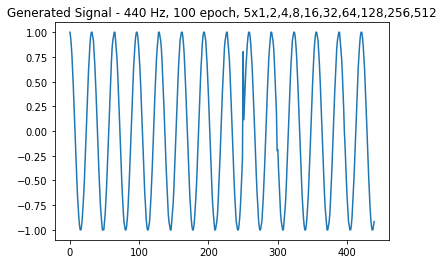

In [65]:
signal = wavfile.read('longSin.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

Reducing the quantization give the following results:

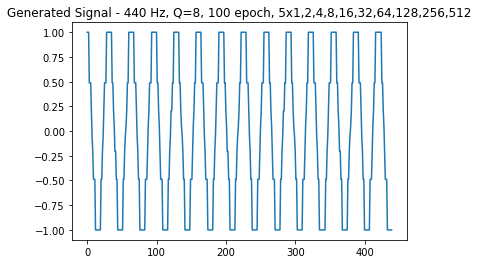

In [72]:
signal = wavfile.read('quantization8.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=8, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

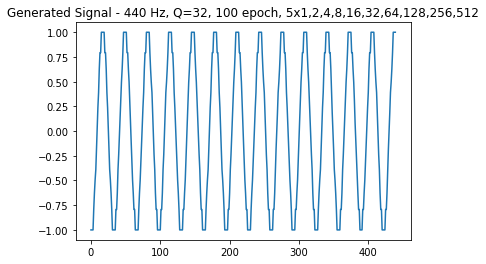

In [67]:
signal = wavfile.read('quantization32.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=32, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

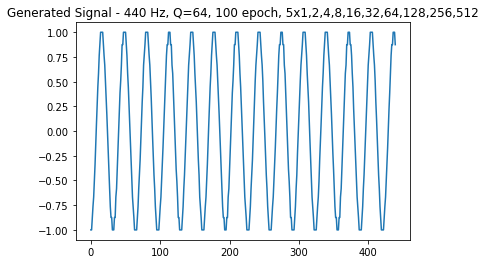

In [77]:
signal = wavfile.read('quantization64.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=64, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

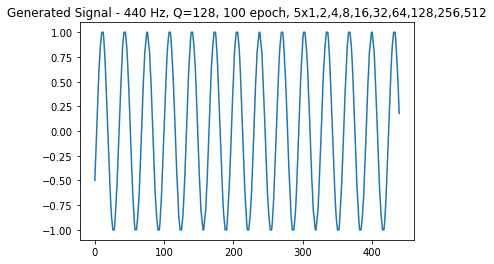

In [69]:
signal = wavfile.read('quantization128.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=128, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

Changing the quantization to **128** good results are achieved. Now, the number of layers will be decreased.

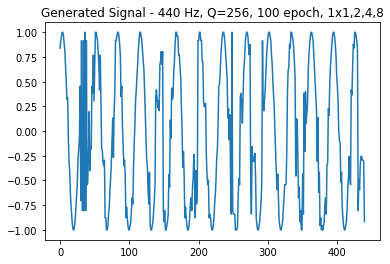

In [74]:
signal = wavfile.read('dilations1x1248.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=256, 100 epoch, 1x1,2,4,8')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

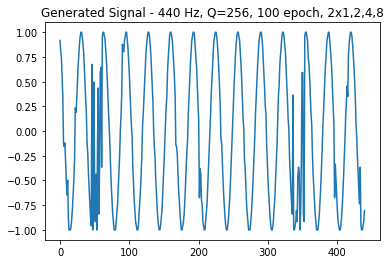

In [76]:
signal = wavfile.read('dilations2x1248.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=256, 100 epoch, 2x1,2,4,8')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

In [ ]:
signal = wavfile.read('dilations3x1248.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=256, 100 epoch, 3x1,2,4,8')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()